# filtros de imagen

## bibliotecas

In [1]:
import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt
import scipy.signal      as signal

from matplotlib.pyplot import imshow, subplot, title, plot

%matplotlib inline

## funciones útiles

In [2]:
def fig(w,h):
    plt.figure(figsize=(w,h))

def readrgb(file):
    return cv.cvtColor( cv.imread("../images/"+file), cv.COLOR_BGR2RGB) 

def rgb2gray(x):
    return cv.cvtColor(x,cv.COLOR_RGB2GRAY)

def gray2float(x):
    return x.astype(float) / 255

# para ver imágenes monocromas autoescalando el rango
def imshowg(x):
    imshow(x, 'gray')

# para ver imágenes monocromas de float con rango fijo
def imshowf(x):
    imshow(x, 'gray', vmin = 0, vmax=1)
    
# para ver imágenes con signo
def imshows(x,r=1):
    imshow(x, 'gray', vmin = -r, vmax=r)

# ojo: filter2D no hace flip de la máscara (realmente hace correlación)
# (da igual en máscaras simétricas)
def conv(k,x):
    return cv.filter2D(x,-1,k)

# esta versión es correcta
def cconv(k,x):
    return signal.convolve2d(x, k, boundary='symm', mode='same')

## filtros de imagen más utilizados

Usamos una imagen cualquiera para ver el resultado

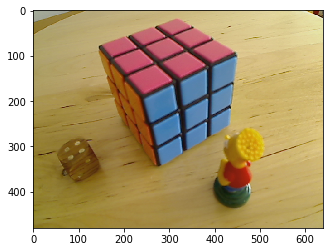

In [3]:
rgb = readrgb("cube3.png")
g = rgb2gray(rgb)
f = gray2float(g)

imshow(rgb);

Esta función recibe una máscara de convolución y compara la imagen original con el resultado del filtro.

In [4]:
def democonv(k,x):
    print(k)
    fig(12,4)
    subplot(1,2,1); imshowf(x); title('original')
    subplot(1,2,2); imshowf(cconv(k,x)); title('resultado')

A partir de aquí probamos el efecto de diferentes máscaras:

[[0 0 0]
 [0 1 0]
 [0 0 0]]


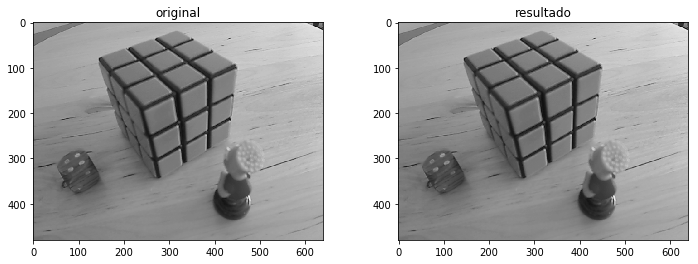

In [5]:
ker = np.array([[ 0, 0, 0]
               ,[ 0, 1, 0]
               ,[ 0, 0, 0]])
democonv(ker,f)

[[0 0 0]
 [0 3 0]
 [0 0 0]]


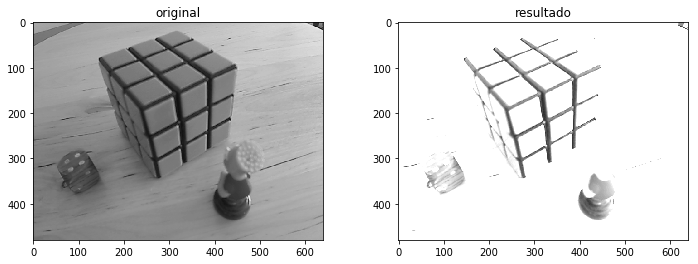

In [6]:
ker = np.array([[ 0, 0, 0]
               ,[ 0, 3, 0]
               ,[ 0, 0, 0]])
democonv(ker,f)

[[ 0.   0.   0. ]
 [ 0.   0.3  0. ]
 [ 0.   0.   0. ]]


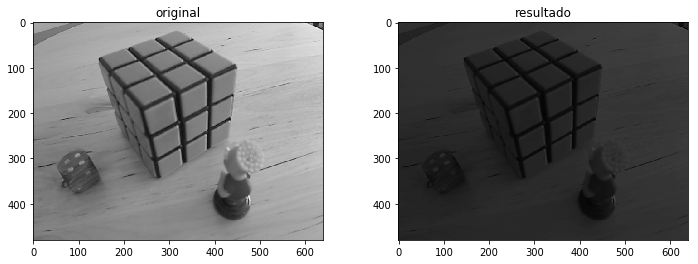

In [7]:
ker = np.array([[ 0, 0, 0]
               ,[ 0, .3, 0]
               ,[ 0, 0, 0]])
democonv(ker,f)

[[ 0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5]]


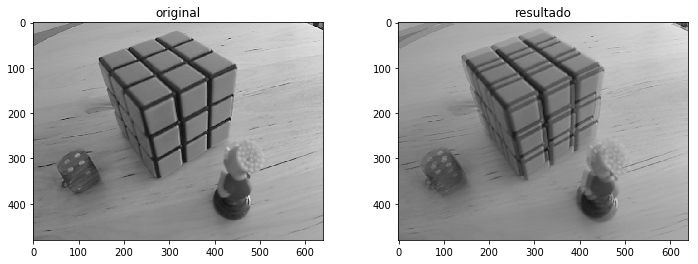

In [8]:
ker = np.zeros([11,11])
ker[0,0] = 1
ker[10,10] = 1
ker = ker/np.sum(ker)

democonv(ker,f)

[[ 0  0  0]
 [-1  0  1]
 [ 0  0  0]]


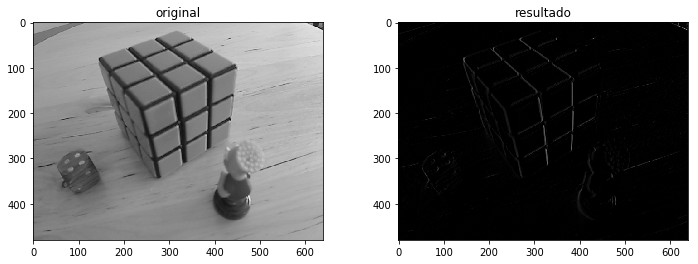

In [9]:
ker = np.array([[ 0, 0, 0]
               ,[ -1, 0, 1]
               ,[ 0, 0, 0]])
democonv(ker,f)

Podemos usar la siguiente versión cuando el resultado es una imagen con signo (negro es negativo, gris cero, y blanco positivo).

In [10]:
def democonvs(k,x,s=1):
    print(k)
    fig(12,4)
    subplot(1,2,1); imshowf(x); title('original')
    subplot(1,2,2); imshows(cconv(k,x),s); title('resultado')

[[ 0  0  0]
 [-1  0  1]
 [ 0  0  0]]


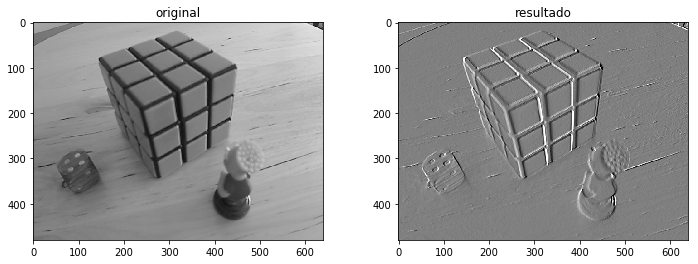

In [11]:
ker = np.array([[ 0, 0, 0]
               ,[ -1, 0, 1]
               ,[ 0, 0, 0]])
democonvs(ker,f,0.2)

[[ 0 -1  0]
 [ 0  0  0]
 [ 0  1  0]]


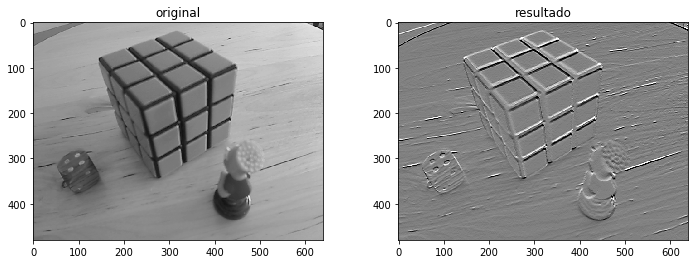

In [12]:
democonvs(np.transpose(ker),f,0.2)

Podemos combinar los dos anteriores para conseguir una medida de "borde" en cualquier orientación:

In [13]:
def bordes(x):
    kx = np.array([[ 0, 0, 0]
                  ,[-1, 0, 1]
                  ,[ 0, 0, 0]])
    #ky = np.transpose(kx)
    ky = kx.T
    gx = cconv(kx,x)
    gy = cconv(ky,x)
    return abs(gx)+abs(gy)

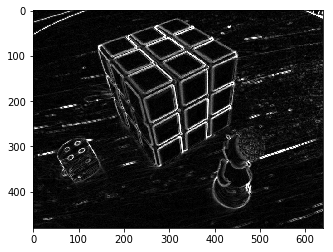

In [14]:
imshowf(3*bordes(f))

El filtro laplaciano deja pasar las altas frencuencias:

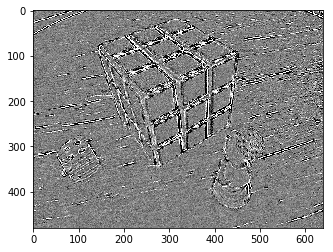

In [15]:
imshows(cv.Laplacian(f,-1),0.05)

### filtros de suavizado (*blurring*)

La siguiente máscara calcula la **media** de un entorno de radio 5.

[[ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.00826446  0.00826446  0.00826446
   0.00826446  0.00826446  0.00826446  0.00826446  0.00826446]
 [ 0.00826446  0.00826446  0.00826446  0.

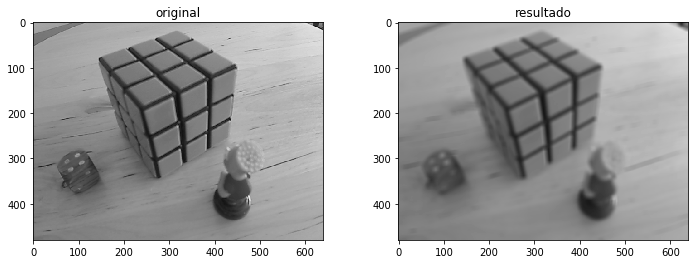

In [16]:
ker = np.ones([11,11])
ker = ker/np.sum(ker)

democonv(ker,f)

Se consigue exactamente el mismo efecto con un "box filter".

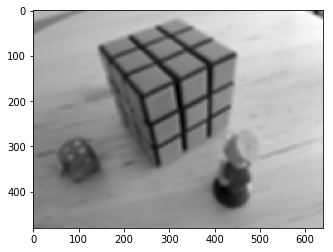

In [17]:
imshowg(cv.boxFilter(f,-1,(11,11)))

Lo interesante es que está implementado internamente usando "imágenes integrales", por lo que el tiempo de cómputo es constante, independientemente del tamaño de la región que se promedia.

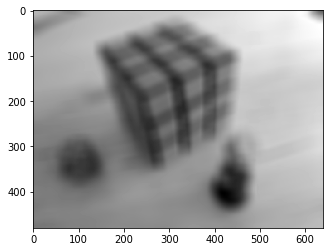

In [18]:
imshowg(cv.boxFilter(f,-1,(30,30)))

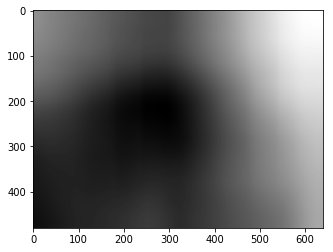

In [19]:
imshowg(cv.boxFilter(f,-1,(300,300)))

No obstante, promediar un entorno abrupto de cada pixel produce "artefactos". La forma correcta de eliminar detalles es usar el filtro **gaussiano**, donde los pixels cercanos tienen más peso en el promedio.

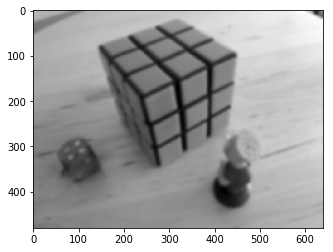

In [20]:
imshowg(cv.GaussianBlur(f,(0,0), 3))

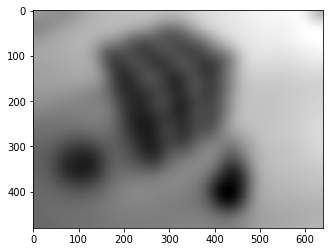

In [21]:
imshowg(cv.GaussianBlur(f,(0,0), 20))

El filtro gaussiano es separable y tiene la propiedad de cascading.

Es interesante observar el efecto en la imagen considerada como una superficie de niveles de gris:

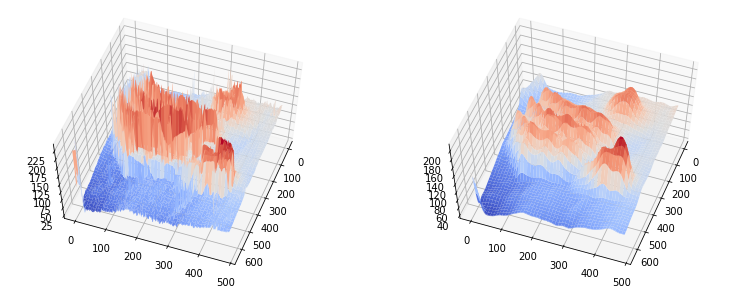

In [22]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(121, projection='3d')

r,c = g.shape
x,y = np.meshgrid(np.arange(c), np.arange(r))

# la coordenada z del gráfico 3D es el nivel de gris de la imagen anterior.
z = 255-g

ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0);
ax.view_init(60, 20)

ax = fig.add_subplot(122, projection='3d')
z = cv.GaussianBlur(255-g,(0,0), 10)

ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0);
ax.view_init(60, 20)

El filtro de **mediana** es no lineal. Es útil para eliminar ruido de "sal y pimienta", suavizando la imagen sin destruir los bordes. (Requiere pixels de tipo byte.)

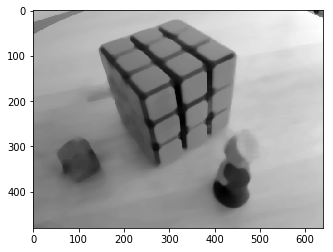

In [23]:
imshowg(cv.medianBlur(g,17))

El filtro **bilateral** solo promedia pixels cercanos que además tienen un valor similar.

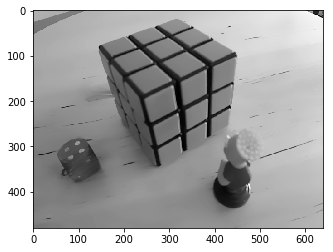

In [24]:
imshowg(cv.bilateralFilter(g,0,10,10))

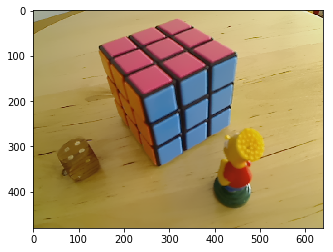

In [25]:
imshowg(cv.bilateralFilter(rgb,0,10,10))

### convolución 1D como operación matricial

La operación de convolución con una máscara es realmente una forma compacta de expresar una operación lineal tradicional. En el caso unidimensional la correspondencia es sencilla:

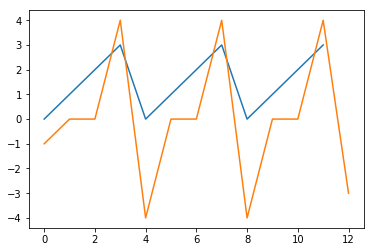

In [26]:
x = np.arange(12)
f = x % 4
plt.plot(f);
h = np.array([-1,2,-1])
r = np.convolve(h,f)
plt.plot(r[1:]);

In [27]:
M = np.zeros([len(x)-2,len(x)])
for k in range(len(x)-2):
    M[k,k:k+3] = h
M

array([[-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.]])

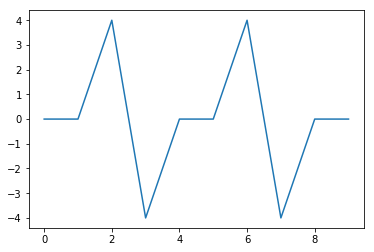

In [28]:
plt.plot(M @ f);

Eso significa que en teoría es posible deshacer el efecto de un filtro lineal resolviendo un sistema de ecuaciones.

### operadores morfológicos

(pendiente)

[tutorial opencv](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html#gsc.tab=0)